In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("netflix_titles.csv")
df.head()



,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [30]:
df.shape # checks (no. of rows, no.of columns)

(8807, 12)

In [31]:
df.columns # gives names of the columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [32]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [33]:
df.isna().sum() # per colmns how many missing values are there

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [34]:
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce') 

In [35]:
df.date_added

0      2021-09-25
1      2021-09-24
2      2021-09-24
3      2021-09-24
4      2021-09-24
          ...    
8802   2019-11-20
8803   2019-07-01
8804   2019-11-01
8805   2020-01-11
8806   2019-03-02
Name: date_added, Length: 8807, dtype: datetime64[ns]

In [36]:
df['duration_num'] = df['duration'].str.extract(r'(\d+)').astype(float)


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      6173 non-null   object        
 4   cast          7982 non-null   object        
 5   country       7976 non-null   object        
 6   date_added    8709 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8803 non-null   object        
 9   duration      8804 non-null   object        
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
 12  duration_num  8804 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(10)
memory usage: 894.6+ KB


In [38]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)

In [39]:
df.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        98
release_year       0
rating             4
duration           3
listed_in          0
description        0
duration_num       3
dtype: int64

In [51]:
# start of EDA
df['type'].value_counts()


type
Movie      6131
TV Show    2676
Name: count, dtype: int64

In [41]:
df['rating'].value_counts().head(10)

rating
TV-MA    3207
TV-14    2160
TV-PG     863
R         799
PG-13     490
TV-Y7     334
TV-Y      307
PG        287
TV-G      220
NR         80
Name: count, dtype: int64

In [42]:
df['country'].value_counts().head(10)


country
United States     2818
India              972
United Kingdom     419
Japan              245
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Egypt              106
Name: count, dtype: int64

In [43]:
df['release_year'].value_counts().sort_index()


release_year
1925       1
1942       2
1943       3
1944       3
1945       4
        ... 
2017    1032
2018    1147
2019    1030
2020     953
2021     592
Name: count, Length: 74, dtype: int64

In [52]:
# filling the unknown/nan values
df['rating'] = df['rating'].fillna("Unknown")
df['duration_num'] = df['duration_num'].fillna(df['duration_num'].median())
df['country'] = df['country'].fillna("Unknown")

In [53]:
df.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country            0
date_added        98
release_year       0
rating             0
duration           3
listed_in          0
description        0
duration_num       0
dtype: int64

In [54]:
df['duration_num'].describe()

count    8807.000000
mean       69.853071
std        50.807276
min         1.000000
25%         2.000000
50%        88.000000
75%       106.000000
max       312.000000
Name: duration_num, dtype: float64

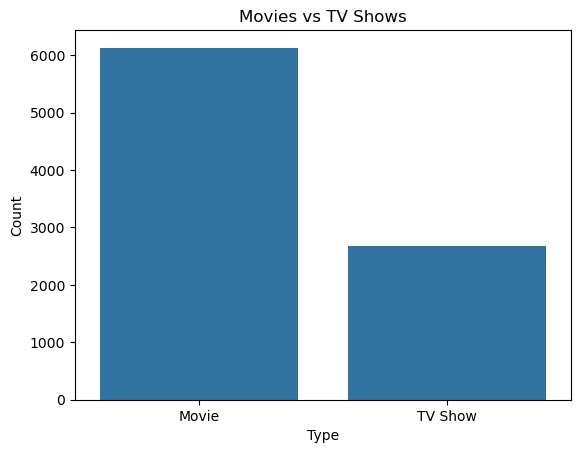

In [55]:
sns.countplot(data=df, x='type')
plt.title("Movies vs TV Shows")
plt.xlabel("Type")
plt.ylabel("Count")
plt.show()


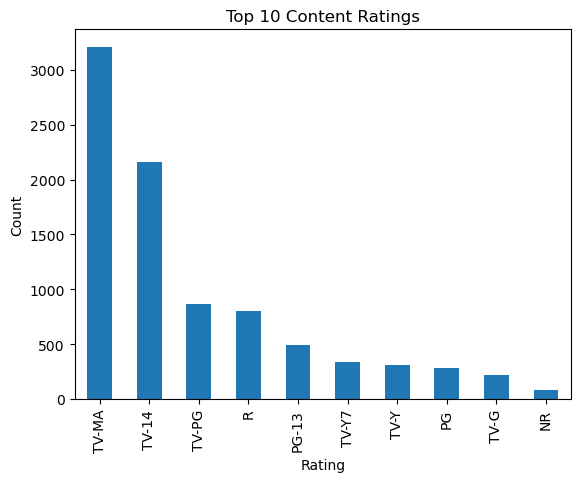

In [56]:
df['rating'].value_counts().head(10).plot(kind='bar')
plt.title("Top 10 Content Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()


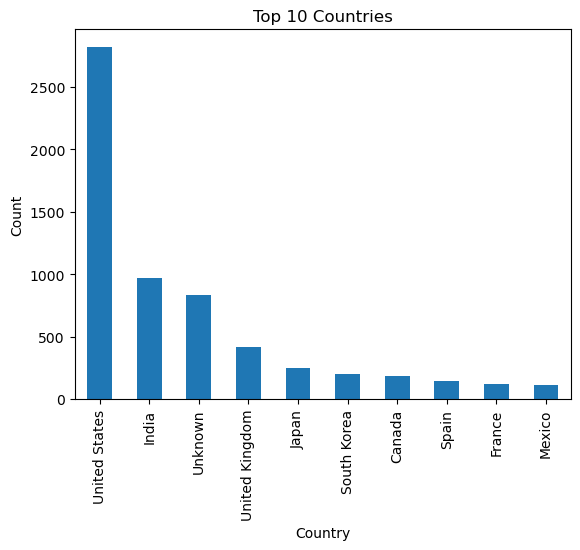

In [57]:
df['country'].value_counts().head(10).plot(kind='bar')
plt.title("Top 10 Countries")
plt.xlabel("Country")
plt.ylabel("Count")
plt.show()


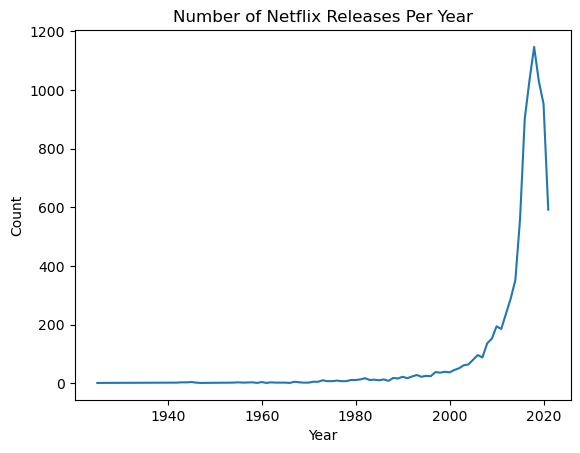

In [58]:
df['release_year'].value_counts().sort_index().plot(kind='line')
plt.title("Number of Netflix Releases Per Year")
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()
